In [233]:
import pandas as pd
import numpy as np
import joblib


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

In [234]:
data = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [235]:
data.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

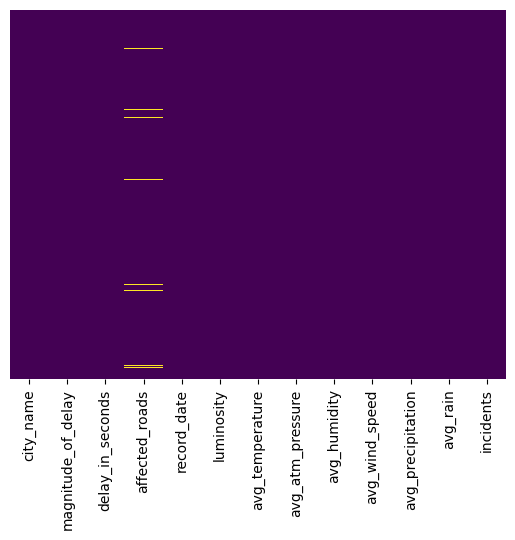

In [236]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [237]:
data['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [238]:
data_m1 = data.copy()
data_m2 = data.copy()

In [239]:
data_m1.drop(['affected_roads'], axis=1, inplace=True)
data_m1.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [240]:
data_m2.fillna(0, inplace=True)
data_m2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [241]:
data.drop(['affected_roads'], axis=1, inplace=True)
test.drop(['affected_roads'], axis=1, inplace=True)

In [242]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [243]:
data['avg_precipitation'].nunique()

1

In [244]:
data['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

In [245]:
data.drop(['avg_precipitation'], axis=1, inplace=True)
test.drop(['avg_precipitation'], axis=1, inplace=True)

data.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [246]:
data['city_name'].head()

0    Guimaraes
1    Guimaraes
2    Guimaraes
3    Guimaraes
4    Guimaraes
Name: city_name, dtype: object

In [247]:
data.drop(['city_name'], axis=1, inplace=True)
test.drop(['city_name'], axis=1, inplace=True)
data.dropna(inplace=True)
test.dropna(inplace=True)

In [248]:
print(data['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [249]:
data_r1 = data.copy()
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [250]:
replace_map = {'incidents': {'None':0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}

In [251]:
labels = data_r1['incidents'].astype('category').cat.categories.tolist()
replace_map_comp = {'incidents' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'incidents': {'High': 1, 'Low': 2, 'Medium': 3, 'None': 4, 'Very_High': 5}}


In [252]:
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [253]:
data_r1.replace(replace_map_comp, inplace=True)
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,4
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,4
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,5
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,1


In [254]:
data_r2 = data.copy()
data_r2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [255]:
data_r2.dtypes

magnitude_of_delay     object
delay_in_seconds        int64
record_date            object
luminosity             object
avg_temperature       float64
avg_atm_pressure      float64
avg_humidity          float64
avg_wind_speed        float64
avg_rain               object
incidents              object
dtype: object

In [256]:
data_r2['None'] = np.where(data_r2['incidents'].str.contains('None'), 1, 0)
data_r2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,None
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,1
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0


In [257]:
data_r2_skl = data_r2.copy()
data_r22 = data.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data_r2_skl['incidents_code'] = lb_make.fit_transform(data_r22['incidents'])

data_r2_skl.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,None,incidents_code
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,1,3
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,3
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0,0


In [258]:
data_r3 = data.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_r3['incidents'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,High,Low,Medium,None,Very_High
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [259]:
result_df = pd.concat([data_r3, lb_results_df], axis=1)
result_df.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,High,Low,Medium,None,Very_High
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,0,0,1,0
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,0,0,0,1,0
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,1,0,0,0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,0,0,0,1
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,0,0,0,0


In [260]:
data_r4 = data.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['incidents'])
df_binary = encoder.fit_transform(data_r4)

df_binary.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0,0,1
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0,0,1
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,0,1,0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0,1,1
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,1,0,0


In [261]:
data_r5 = data.copy()

encoder = ce.BackwardDifferenceEncoder(cols=['incidents'])
df_bd = encoder.fit_transform(data_r5)

df_bd.head()

/home/private/anaconda3/envs/daa/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/home/private/anaconda3/envs/daa/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2,incidents_3
0,1,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,-0.8,-0.6,-0.4,-0.2
1,1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,-0.8,-0.6,-0.4,-0.2
2,1,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,0.2,-0.6,-0.4,-0.2
3,1,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0.2,0.4,-0.4,-0.2
4,1,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,0.2,0.4,0.6,-0.2


In [262]:
data_r6 = data.copy()

In [263]:
data_r6['incidents'] = pd.factorize(data_r6['incidents'])[0] + 1
data_r6.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,1
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,1
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,3
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,4


In [264]:
#data['incidents'] = pd.factorize(data['incidents'])[0] + 1
#data.head()

fatorização

In [265]:
#data['magnitude_of_delay'] = pd.factorize(data['magnitude_of_delay'])[0] + 1
#data['luminosity'] = pd.factorize(data['luminosity'])[0] + 1
#data['avg_rain'] = pd.factorize(data['avg_rain'])[0] + 1
#
#test['magnitude_of_delay'] = pd.factorize(test['magnitude_of_delay'])[0] + 1
#test['luminosity'] = pd.factorize(test['luminosity'])[0] + 1
#test['avg_rain'] = pd.factorize(test['avg_rain'])[0] + 1
#
#data.head()

In [266]:
data.replace(replace_map, inplace=True)
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3


In [267]:
data['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [268]:
data['record_date'] = pd.to_datetime(data['record_date'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')
test['record_date'] = pd.to_datetime(test['record_date'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')

In [269]:
assert data['record_date'].isnull().sum() == 0, 'missing record date'
assert test['record_date'].isnull().sum() == 0, 'missing record date'

In [270]:
data['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [271]:
data['record_date_year'] = data['record_date'].dt.year
data['record_date_month'] = data['record_date'].dt.month
data['record_date_day'] = data['record_date'].dt.day
data['record_date_hour'] = data['record_date'].dt.hour
data['record_date_minute'] = data['record_date'].dt.minute

test['record_date_year'] = test['record_date'].dt.year
test['record_date_month'] = test['record_date'].dt.month
test['record_date_day'] = test['record_date'].dt.day
test['record_date_hour'] = test['record_date'].dt.hour
test['record_date_minute'] = test['record_date'].dt.minute

data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,0,2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0,2021,3,15,23,0
1,UNDEFINED,385,2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0,2021,12,25,18,0
2,UNDEFINED,69,2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1,2021,3,12,15,0
3,MAJOR,2297,2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4,2021,9,29,9,0
4,UNDEFINED,0,2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3,2021,6,13,11,0


In [272]:
data.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

In [273]:
data.drop('record_date_year', axis=1, inplace=True)
data.drop('record_date_minute', axis=1, inplace=True)
data.drop('record_date', axis=1, inplace=True)
data.dropna(inplace=True)

test.drop('record_date_year', axis=1, inplace=True)
test.drop('record_date_minute', axis=1, inplace=True)
test.drop('record_date', axis=1, inplace=True)
test.dropna(inplace=True)

In [274]:
from sklearn.model_selection import train_test_split


In [275]:
y = data['incidents']    
x = data.loc[:, data.columns != "incidents"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

In [276]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [277]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state=2022)
clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'MAJOR'

In [ ]:
predictions_clf = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
print(classification_report(y_test,predictions_clf))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       632
           2       0.84      0.80      0.82       201
           3       0.85      0.88      0.86       179
           4       0.87      0.86      0.86       313
           5       0.85      0.79      0.82       175

    accuracy                           0.89      1500
   macro avg       0.87      0.86      0.87      1500
weighted avg       0.89      0.89      0.89      1500



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ccp_alphas = clf.cost_complexity_pruning_path(x_train, y_train)["ccp_alphas"]

param_grid_clf = {'criterion': ["gini","entropy","log_loss"], 'max_depth': [8,10,20]}


In [ ]:
grid_clf = GridSearchCV(clf,param_grid_clf,refit=True,verbose=3)
grid_clf.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......criterion=gini, max_depth=8;, score=0.883 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=8;, score=0.866 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=8;, score=0.891 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=8;, score=0.896 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=8;, score=0.891 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.894 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.876 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.891 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.894 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.880 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=20;, score=0.894 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=20;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=2022),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 20]},
             verbose=3)

In [ ]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [ ]:
grid_predictions2 = grid_clf.predict(x_test)
grid_predictions2

array([2, 3, 1, ..., 4, 2, 4])

In [ ]:
print(classification_report(y_test,grid_predictions2))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       632
           2       0.88      0.87      0.87       201
           3       0.88      0.89      0.89       179
           4       0.88      0.88      0.88       313
           5       0.84      0.82      0.83       175

    accuracy                           0.91      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
data.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,1,0,1,12.0,1013.0,70.0,1.0,1,1,3,15,23
1,1,385,1,12.0,1007.0,91.0,1.0,1,1,12,25,18
2,1,69,2,14.0,1025.0,64.0,0.0,1,2,3,12,15
3,2,2297,2,15.0,1028.0,75.0,1.0,1,3,9,29,9
4,1,0,2,27.0,1020.0,52.0,1.0,1,4,6,13,11


In [ ]:
grid_predictions2 = grid_clf.predict(test)

df = pd.DataFrame({"incidents":grid_predictions2})

def update(x):
    if x == 1:
        return "None"
    elif x == 2:
        return "Low"
    elif x == 5:
        return "Medium"
    elif x == 4:
        return "High"
    else:
        return "Very High"

df['incidents'] = df['incidents'].apply(update)
df.index = np.arange(1, len(df) + 1)

df.to_csv('test_clf.csv',index_label="RowId")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=2022)
rf.fit(x_train, y_train)

print(classification_report(y_test, rf.predict(x_test)))

ValueError: could not convert string to float: 'MAJOR'